# Milestone 2 Phase 1 (Modeling)

## Model Deploy Link

https://huggingface.co/spaces/AndreLie95/Deploy_Milestone_2

## Dataset Link

https://www.kaggle.com/datasets/prosperchuks/health-dataset?resource=download&select=diabetes_data.csv

## Introduction
### Identity
```txt
Name : Andre Lie
Class : FTDS (Offline)
Batch : 03
```

### Objective Statement
Membuat model machine learning yang dapat classifikasikan apakah pasien dengan data-data pendukung beresiko terkena penyakit diabetes atau tidak.

### Problem Statement
1. jelaskan hubungan antara resiko penyakit diabetes dengan umur dan bmi ?
2. apakah riwayat penyakit lain seperti stroke, hypertension memiliki hubungan dengan resiko penyakit diabetes ?
3. berdasarkan dataset yang dimiliki, pada umur berapa biasanya pasien memiliki resiko diabetes lebih tinggi ?
4. model apa saja yang dipakai untuk proses classification ?
5. apakah model yang dibuat sudah cukup baik memprediksi resiko penyakit diabetes ?
6. apa yang bisa dimprove dari model yang sudah dibuat ?

## Import Library

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import phik
from phik.report import plot_correlation_matrix
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV
from feature_engine.outliers import Winsorizer
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import joblib
import warnings

## Loading Data

In [2]:
# mengabaikan pesan warning yang muncul
warnings.filterwarnings('ignore')

In [3]:
# membaca dataset dengan pandas
df_ori = pd.read_csv('diabetes_data.csv')
df_ori

,Age,Sex,HighChol,CholCheck,BMI,Smoker,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,GenHlth,MentHlth,PhysHlth,DiffWalk,Stroke,HighBP,Diabetes
0,4.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,0.0,1.0,0.0,3.0,5.0,30.0,0.0,0.0,1.0,0.0
1,12.0,1.0,1.0,1.0,26.0,1.0,0.0,0.0,1.0,0.0,0.0,3.0,0.0,0.0,0.0,1.0,1.0,0.0
2,13.0,1.0,0.0,1.0,26.0,0.0,0.0,1.0,1.0,1.0,0.0,1.0,0.0,10.0,0.0,0.0,0.0,0.0
3,11.0,1.0,1.0,1.0,28.0,1.0,0.0,1.0,1.0,1.0,0.0,3.0,0.0,3.0,0.0,0.0,1.0,0.0
4,8.0,0.0,0.0,1.0,29.0,1.0,0.0,1.0,1.0,1.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
70687,6.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,1.0,0.0,4.0,0.0,0.0,0.0,0.0,0.0,1.0
70688,10.0,1.0,1.0,1.0,29.0,1.0,1.0,0.0,1.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,0.0,1.0
70689,13.0,0.0,1.0,1.0,25.0,0.0,1.0,0.0,1.0,0.0,0.0,5.0,15.0,0.0,1.0,0.0,1.0,1.0
70690,11.0,0.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,1.0


In [4]:
df_ori.max()

Age                     13.0
Sex                      1.0
HighChol                 1.0
CholCheck                1.0
BMI                     98.0
Smoker                   1.0
HeartDiseaseorAttack     1.0
PhysActivity             1.0
Fruits                   1.0
Veggies                  1.0
HvyAlcoholConsump        1.0
GenHlth                  5.0
MentHlth                30.0
PhysHlth                30.0
DiffWalk                 1.0
Stroke                   1.0
HighBP                   1.0
Diabetes                 1.0
dtype: float64

Data Description
|Nama Kolom|Ket|Cat/Num|
|----------|---|-------|
|Age|1 = age 18 - 24 <br> 2 = age 25 - 29 <br> 3 = age 30 - 34 <br> 4 = age 35 - 39 <br> 5 = age 40 - 44 <br> 6 = age 45 - 49 <br> 7 = age 50 - 54 <br> 8 = age 55 - 59 <br> 9 = age 60 - 64 <br> 10 = age 65 - 69 <br> 11 = age 70 - 74 <br> 12 = age 75 - 79 <br> 13 = age 80 or older|Cat|
|Sex|0 = Female <br> 1 = Male|Cat|
|HighChol|0 = no high cholesterol <br> 1 = high cholesterol|Cat|
|CholCheck|0 = no cholesterol check in 5 years <br> 1 = yes cholesterol check in 5 years|Cat|
|BMI|Body Mass Index|Num|
|Smoker|Have you smoked at least 100 cigarettes in your entire life? <br> [Note: 5 packs = 100 cigarettes] <br> 0 = no <br> 1 = yes|Cat|
|HeartDiseaseorAttack|coronary heart disease (CHD) or myocardial infarction (MI) <br> 0 = no <br> 1 = yes|Cat|
|PhysActivity|physical activity in past 30 days - not including job <br> 0 = no <br> 1 = yes|Cat|
|Fruits|Consume Fruit 1 or more times per day <br> 0 = no <br> 1 = yes|Cat|
|Veggies|Consume Vegetables 1 or more times per day <br> 0 = no <br> 1 = yes|Cat
|HvyAlcoholConsump|(adult men >=14 drinks per week and adult women>=7 drinks per week) <br> 0 = no <br> 1 = yes|Cat|
|GenHlth|Would you say that in general your health is: scale 1-5 <br> 1 = excellent <br> 2 = very good <br> 3 = good <br> 4 = fair <br> 5 = poor|Cat|
|MentHlth|days of poor mental health scale 1-30 days|Num|
|PhysHlth|physical illness or injury days in past 30 days scale 1-30|Num|
|DiffWalk|Do you have serious difficulty walking or climbing stairs? <br> 0 = no <br> 1 = yes|Cat|
|Stroke|you ever had a stroke. <br> 0 = no <br> 1 = yes|Cat|
|HighBP|0 = no high <br> BP 1 = high BP|Cat|
|Diabetes|0 = no diabetes <br> 1 = diabetes|Cat|

In [5]:
# melakukan copy dataset
df = df_ori.copy()

In [6]:
# mengecheck data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70692 entries, 0 to 70691
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Age                   70692 non-null  float64
 1   Sex                   70692 non-null  float64
 2   HighChol              70692 non-null  float64
 3   CholCheck             70692 non-null  float64
 4   BMI                   70692 non-null  float64
 5   Smoker                70692 non-null  float64
 6   HeartDiseaseorAttack  70692 non-null  float64
 7   PhysActivity          70692 non-null  float64
 8   Fruits                70692 non-null  float64
 9   Veggies               70692 non-null  float64
 10  HvyAlcoholConsump     70692 non-null  float64
 11  GenHlth               70692 non-null  float64
 12  MentHlth              70692 non-null  float64
 13  PhysHlth              70692 non-null  float64
 14  DiffWalk              70692 non-null  float64
 15  Stroke             

Semua kolom di dataset kita berubah data numberic, tetapi sepertinya sebagian besar adalah kolom categorical yang sudah diencoding. maka dari itu perlu kita pisahkan kembali col numberical dan categorical secara manual.

In [7]:
# memisahkan antara data categorical dan data numberical
num_col = ['BMI', 'MentHlth', 'PhysHlth']
cat_col = ['Age', 'Sex', 'HighChol', 'CholCheck', 'Smoker',
           'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
           'HvyAlcoholConsump', 'GenHlth', 'DiffWalk',
           'Stroke', 'HighBP', 'Diabetes']

## Exploratory Data Analysis (EDA)

### Search Corelations between features and target

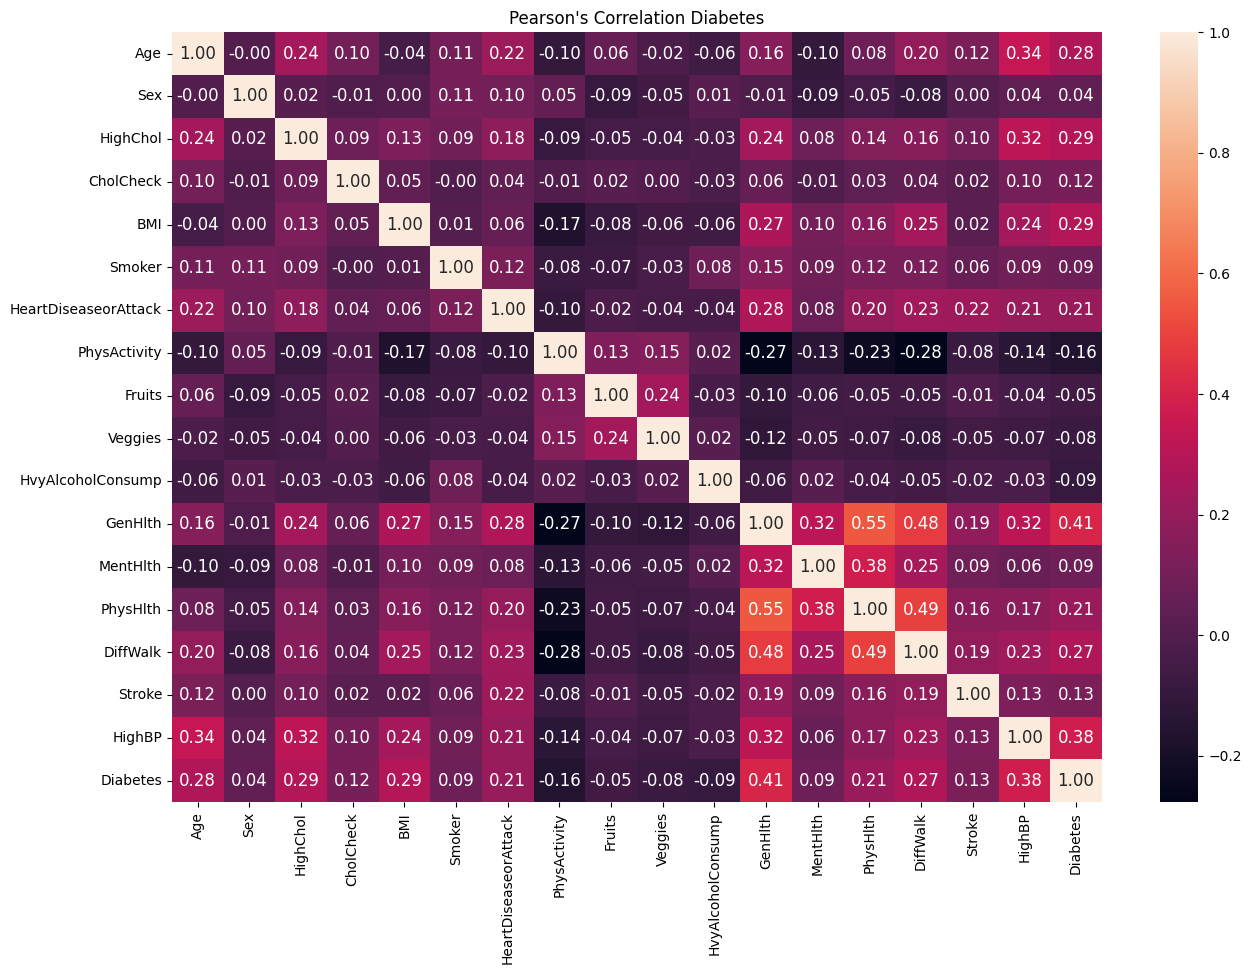

In [8]:
# plot hubungan antara fitur dengan target menggunakan Pearson Correlation
plt.figure(figsize=(15,10))
sns.heatmap(data=df.corr(), annot=True, fmt='.2f', annot_kws={'size': 12})
plt.title("Pearson's Correlation Diabetes");

berdasarkan pearson correlations kolom yang berhubungan dengan resiko penyakit diabetes (>0.25) adalah kolom age, highchol, bmi, genhlth, diffwalk, highBP.

In [9]:
# membuat matrik phik dari data frame
phik_overview = df.phik_matrix()

interval columns not set, guessing: ['Age', 'Sex', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'GenHlth', 'MentHlth', 'PhysHlth', 'DiffWalk', 'Stroke', 'HighBP', 'Diabetes']


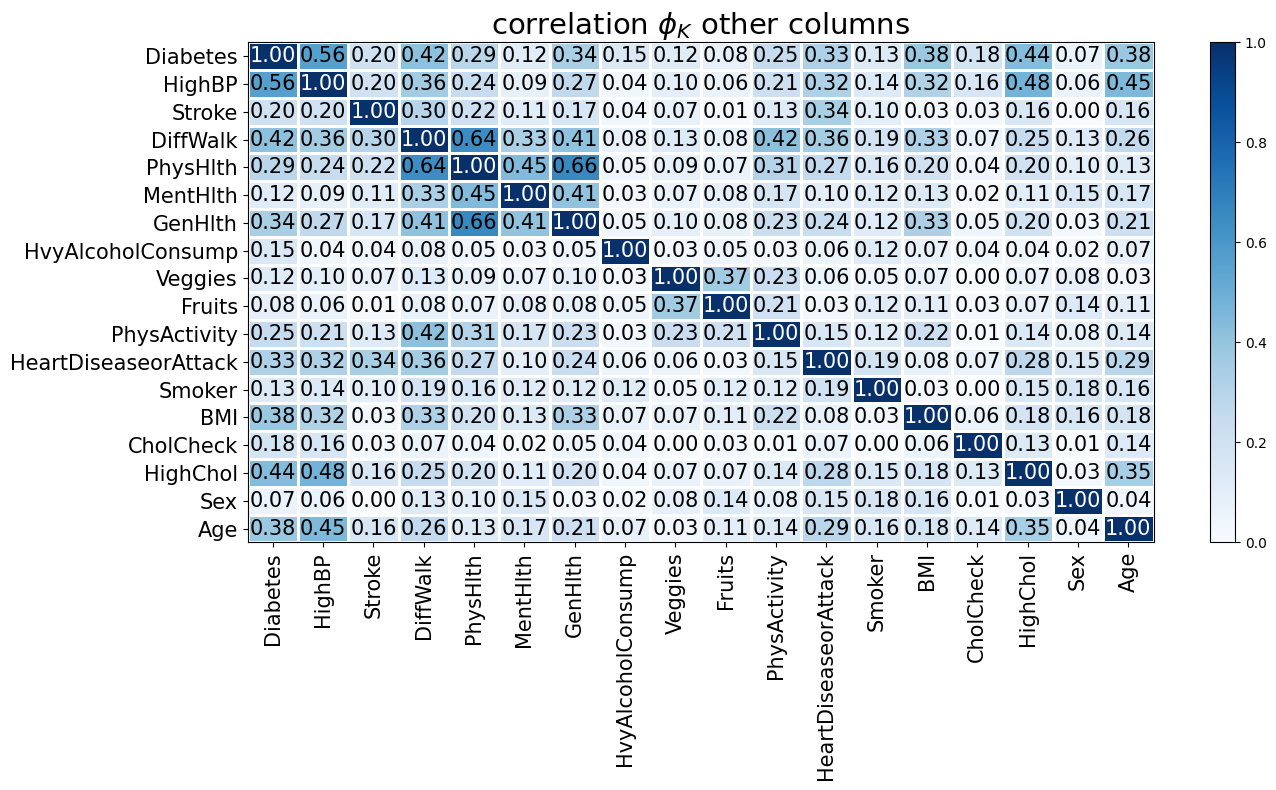

In [10]:
#  Plot hubungan antara fitur dengan target menggunakan Phik Correlation
plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        vmin=0, vmax=1, color_map='Blues', 
                        title=r"correlation $\phi_K$ other columns", 
                        fontsize_factor=1.5, 
                        figsize=(14,8))
plt.tight_layout()

berdasarkan phik correlations kolom yang berhubungan dengan resiko penyakit diabetes (>0.3) adalah kolom age, highchol, bmi, heartdiseaseorAttack, genhlth, diffwalk, highBP.

jika berdasarkan background saya sebagai seorang apoteker, seharusnya kolom yang terpilih dengan phik correlation adalah kolom-kolom yang berhubungan dengan resiko kemungkinan diabetes, tetapi harus tetap kita buktikan dengan hasil evaluasi model

1. jelaskan hubungan antara resiko penyakit diabetes dengan umur dan bmi ?

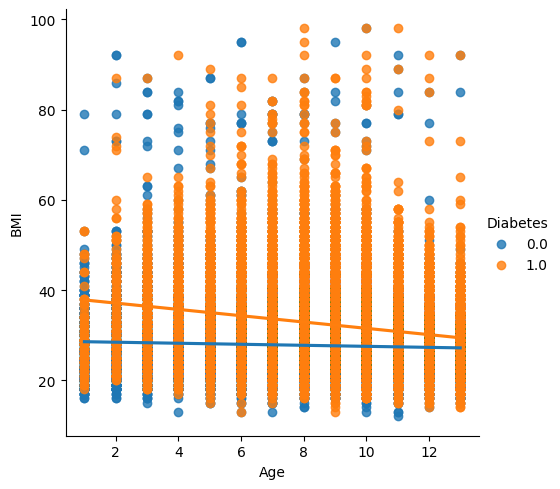

In [11]:
# plot perbandingan antara umur dan bmi dengan resiko diabetes
sns.lmplot(data=df, x='Age', y='BMI', hue='Diabetes')

berdasarkan visualisasi data diatas, dapat di katakan bahwa pertambahan usia dan penurunan BMI dapat mengurangi kejadian penyakit diabetes.

2. apakah riwayat penyakit lain seperti stroke, hypertension memiliki hubungan dengan resiko penyakit diabetes ?

berdasarkan hasil visualisasi data menggunakan phik ada hubungan antara riwayat penyakit jantung dengan resiko penyakit diabetes.

### Look at Data Distributions

BMI Skewness Level : 1.7191801918140364
BMI is right skew

MentHlth Skewness Level : 2.388109639646643
MentHlth is right skew

PhysHlth Skewness Level : 1.6573043998917887
PhysHlth is right skew



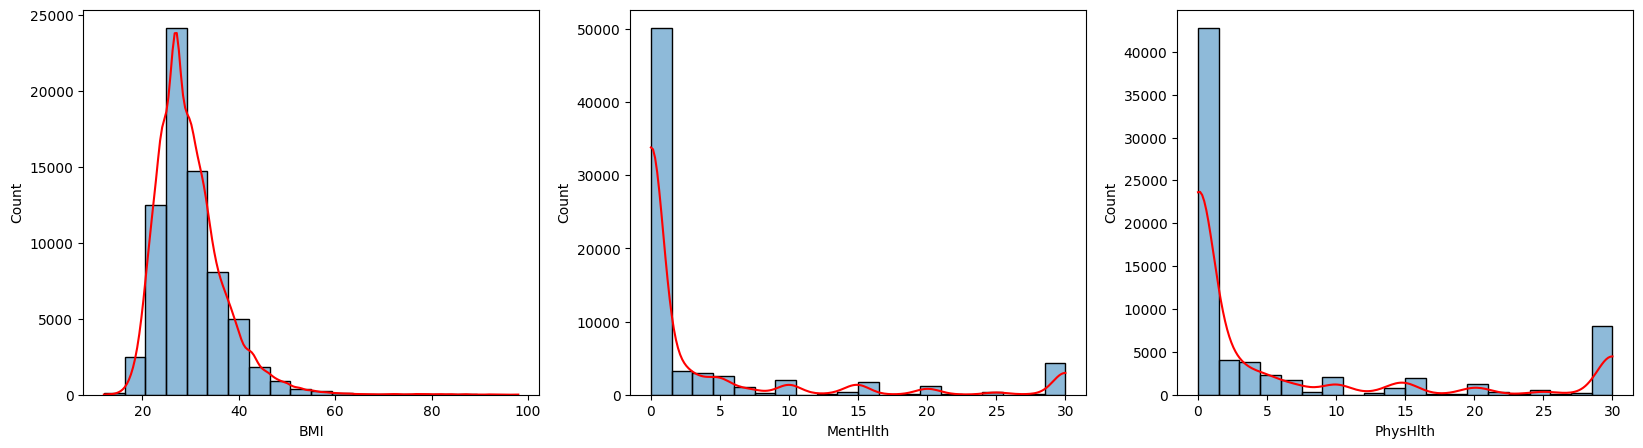

In [12]:
# plot distribusi data untuk data numberical
fig, axes = plt.subplots(ncols=3, figsize=(20, 5))
axes = axes.flatten()
a = 0
for c in df[num_col]:
    sns.histplot(data=df[c],ax=axes[a], kde=True, bins=20).lines[0].set_color('red')
    a = a+1

# menghitung dan menampilkan distribusi data
for col in df[num_col]:
    print(df[col].name,'Skewness Level :', df[col].skew())
    if df[col].skew() > 0.5 :
        print(df[col].name,'is right skew')
    elif df[col].skew() < -0.5 :
        print(df[col].name,'is left skew')
    else :
        print(df[col].name,'is normal distributed')
    print("")

terlihat bahwa seluruh data numberical kita memiliki distribusi data yang tidak normal, sehingga untuk proses handling missing values nanti harus menggunakan data median, dan jika ada outlier harus dihandling dengan metode IQR*1.5.

### Search target proportion

<AxesSubplot: ylabel='Diabetes'>

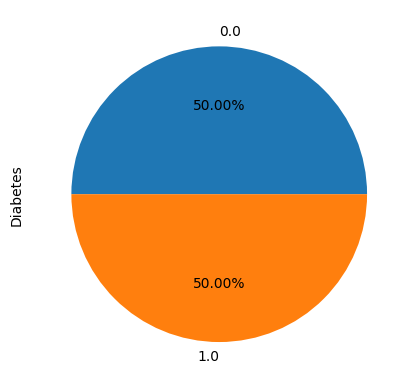

In [13]:
# plot pengecheckan imbalance data target
df['Diabetes'].value_counts().plot(kind='pie', autopct='%.2f%%')

data target yang kita miliki ternyata sudah balance, sehingga tidak perlu lagi kita lakukan handling data imbalance.

3. berdasarkan dataset yang dimiliki, pada umur berapa biasanya pasien memiliki resiko diabetes lebih tinggi ?

<AxesSubplot: >

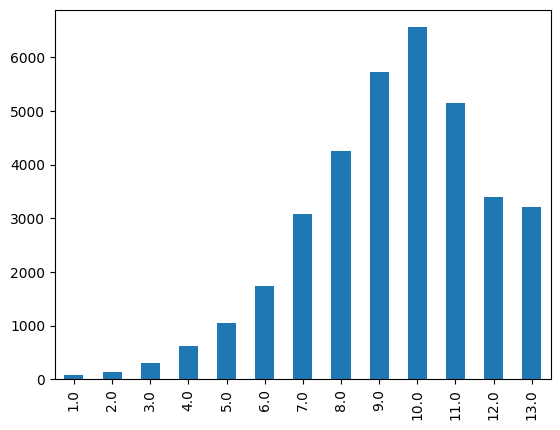

In [14]:
# plot data pasien penderita diabetes berdasarkan umur
df[(df['Diabetes'] == 1)]['Age'].value_counts().sort_index().plot(kind='bar', )

berdasarkan data pasien golongan umur 10 (65-69 tahun) adalal pasien yang memiliki resiko penyakit diabetes paling tinggi.

## Data Preprocessing

### Look Multicolinearity 

In [15]:
# kalkulator VIF
def vif(c):
    vif = pd.DataFrame()
    vif['Column'] = c.columns
    vif['VIF'] = [variance_inflation_factor(c.values, i) for i in range(c.shape[1])]

    return vif

In [16]:
# mencari multicolinearity antara fitur 1
vif(df[['Age', 'HighChol', 'BMI', 'HeartDiseaseorAttack', 'GenHlth', 'DiffWalk', 'HighBP']])

,Column,VIF
0,Age,8.024636
1,HighChol,2.466455
2,BMI,10.249143
3,HeartDiseaseorAttack,1.333910
4,GenHlth,9.805113
5,DiffWalk,1.687712
6,HighBP,2.954820


berdasarkan kolom yang memiliki korelasi dengan target dilakukan pencarian kesamaan informasi antara tiap kolomnya, dan ternya tidak terdapat persamaan informasi antara kolom fitur (<=10)

### Look Cardinality

In [17]:
# menampilkan jumlah keragamaan data categorical
for i in df[cat_col]:
    print(i,df[i].nunique())

Age 13
Sex 2
HighChol 2
CholCheck 2
Smoker 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
GenHlth 5
DiffWalk 2
Stroke 2
HighBP 2
Diabetes 2


terlihat bahwa umur memiliki cardinality yang cukup tinggi, sehingga perlu kita turunkan. dikarenakan sebelumnya dikelompokan menjadi setiap 5 tahun, makan akan kita group lagi menjadi 1 kelompok memuat 10 tahun.

maka keterangan umur akan menjadi :
|Golongan|Umur sebelum|Umur Sesudah|
|--|--|--|
|1|18 - 24|18 - 24|
|2|25 - 29|25 - 34|
|3|30 - 34|35 - 44|
|4|35 - 39|45 - 54|
|5|40 - 44|55 - 64|
|6|45 - 49|65 - 74|
|7|50 - 54|75 or older|
|8|55 - 59||
|9|60 - 64||
|10|65 - 69||
|11|70 - 74||
|12|75 - 79||
|13|80 or older||

In [18]:
# mengecilkan cardinality dari kolom umur
df['Age'].replace({3 : 2, 4 : 3, 5 : 3, 6 : 4, 7 : 4, 8 : 5, 9 : 5, 10 : 6, 11 : 6, 12 : 7, 13 : 7}, inplace=True)

In [19]:
# menampilkan kembali jumlah keragamaan data categorical
for i in df[cat_col]:
    print(i,df[i].nunique())

Age 7
Sex 2
HighChol 2
CholCheck 2
Smoker 2
HeartDiseaseorAttack 2
PhysActivity 2
Fruits 2
Veggies 2
HvyAlcoholConsump 2
GenHlth 5
DiffWalk 2
Stroke 2
HighBP 2
Diabetes 2


terlihat data umur sudah dikurangi jumlah kategorinya.

### Look Missing Values

In [20]:
df.isnull().sum()

Age                     0
Sex                     0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Stroke                  0
HighBP                  0
Diabetes                0
dtype: int64

In [21]:
# look for missing value : strange inputations
for i in df:
    print(i, ':',df[i].unique())

Age : [3. 7. 6. 5. 1. 4. 2.]
Sex : [1. 0.]
HighChol : [0. 1.]
CholCheck : [1. 0.]
BMI : [26. 28. 29. 18. 31. 32. 27. 24. 21. 58. 30. 20. 22. 38. 40. 25. 36. 47.
 19. 37. 41. 23. 34. 35. 42. 17. 33. 44. 15. 52. 69. 56. 45. 39. 92. 53.
 98. 50. 46. 79. 48. 16. 63. 72. 54. 49. 68. 43. 84. 73. 76. 55. 51. 75.
 57. 60. 12. 77. 82. 67. 71. 61. 14. 81. 59. 86. 13. 87. 65. 95. 89. 62.
 64. 66. 85. 70. 83. 80. 78. 74.]
Smoker : [0. 1.]
HeartDiseaseorAttack : [0. 1.]
PhysActivity : [1. 0.]
Fruits : [0. 1.]
Veggies : [1. 0.]
HvyAlcoholConsump : [0. 1.]
GenHlth : [3. 1. 2. 4. 5.]
MentHlth : [ 5.  0.  7.  3.  4.  2. 30. 20.  1. 15. 10. 25. 14. 28.  6. 29. 26. 12.
 16. 22. 13.  8.  9. 21. 18. 17. 27. 24. 23. 11. 19.]
PhysHlth : [30.  0. 10.  3.  6.  4. 15.  1.  2. 14.  7. 25. 21. 20.  5.  8. 22. 23.
 29. 12. 18. 28. 26. 24. 27. 11. 13. 16. 17.  9. 19.]
DiffWalk : [0. 1.]
Stroke : [0. 1.]
HighBP : [1. 0.]
Diabetes : [0. 1.]


terlihat bahwa tidak terdapat data dengan missing values baik secara imputasi atau pun character yang tidak sesuai peruntukannya.

### Look Duplicated Data

In [22]:
# melihat data duplikasi
df.duplicated().sum()/df.duplicated().count()*100

13.60974367679511

In [23]:
# melihat banyaknya inputan data
df.shape

(70692, 18)

karena adanya data duplicate sebesar 13% dari data dan data yang kita miliki tergolong banyak yaitu 70692 entry data. maka dapat kita drop saja data yang duplicate tersebut.

In [24]:
# menghapus data duplikat
df.drop_duplicates(inplace=True, ignore_index=True)

In [25]:
# crosscheck data duplikasi
df.duplicated().sum()/df.duplicated().count()*100

0.0

sekarang data yang kita miliki sudah terbebas dari data duplikasi.

### Train-Test Split / Split Dataset

In [26]:
# membagi data menjadi data train dan test
f = df.drop('Diabetes', axis=1)
t = df['Diabetes']
f_train, f_test, t_train, t_test = train_test_split(f, t, test_size=0.2, random_state=2895)

karena data yang kita miliki cukup banyak, maka 20% dari data saja sudah cukup dipakai sebagai data test.

## Feature Engineering

### Looking for Outlier

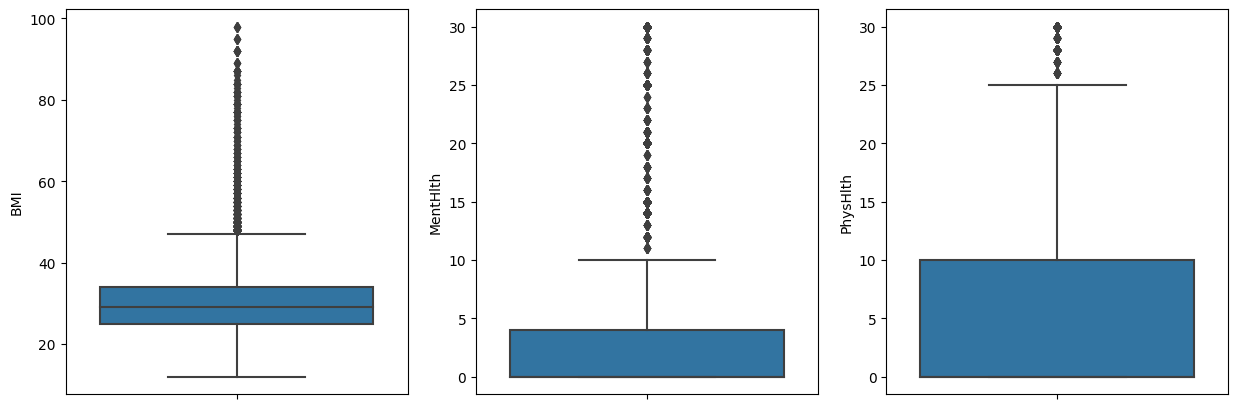

In [27]:
# mengecheck outlier yang ada di fitur train kita
fig, axes = plt.subplots(ncols=3, figsize=(15, 5))
axes = axes.flatten()
a = 0
for c in f_train[num_col]:
    sns.boxplot(y=c ,data=f_train ,ax=axes[a], whis=1.5)
    a = a+1

berdasarkan hasil box plot semua data number memiliki outlier. maka perlu dihitung terlebih dahulu berapa % jumlah outlier yang terdapat dari masing-masing data.

In [28]:
# fungsi untuk menetapan batas outlier
def outlier(data, col, cons):
    IQR = data[col].quantile(0.75) - data[col].quantile(0.25)
    
    lower_bound = data[col].quantile(0.25) - (IQR * cons)
    upper_bound = data[col].quantile(0.75) + (IQR * cons)
    
    return lower_bound, upper_bound

In [29]:
# melakukan pengecheckan persentase outlier
for i in f_train[num_col]:
    lower_bound, upper_bound = outlier(data=f_train, col=i, cons=1.5)
    percentage_outlier_train = (f_train[i][(f_train[i] < lower_bound) | (f_train[i] > upper_bound)].count())/(f_train[i].count())*100
    print(f'percentage f_train {i} outlier :', percentage_outlier_train, '%')

percentage f_train BMI outlier : 2.5094154249222203 %
percentage f_train MentHlth outlier : 14.0289831341084 %
percentage f_train PhysHlth outlier : 13.547977730473226 %


karena data numberical kita memiliki nilai outlier yang tinggi, beberapa model yang kita pakai sensitive terhadap adanya outlier maka harus kita handling terlebih dahulu.

### Handling Outlier

In [30]:
# melakukan capping data
winsor = Winsorizer(capping_method='iqr',
                    tail='both',
                    fold=1.5,
                    variables=num_col)

f_train = winsor.fit_transform(f_train)

In [31]:
# melakukan pengecheckan persentase outlier setelah di capping
for i in f_train[num_col]:
    lower_bound, upper_bound = outlier(data=f_train, col=i, cons=1.5)
    percentage_outlier_train = (f_train[i][(f_train[i] < lower_bound) | (f_train[i] > upper_bound)].count())/(f_train[i].count())*100
    print(f'percentage f_train {i} outlier :', percentage_outlier_train, '%')

percentage f_train BMI outlier : 0.0 %
percentage f_train MentHlth outlier : 0.0 %
percentage f_train PhysHlth outlier : 0.0 %


### Feature Selection

berdasarkan nilai korelasi phik dan hasil perhitung VIF

In [32]:
# mendefinisikan colom yang dipakai sebagai fitur berdasarkan correlation phik
f_num_phik = ['BMI']
f_cat_phik = ['Age', 'HighChol', 'HeartDiseaseorAttack', 'GenHlth', 'DiffWalk', 'HighBP']

berdasarkan nilai korelasi pearson dan hasil perhitung VIF

In [33]:
# mendefinisikan colom yang dipakai sebagai fitur berdasarkan correlation Pearson
f_num_pearson = ['BMI']
f_cat_pearson = ['Age', 'HighChol', 'GenHlth', 'DiffWalk', 'HighBP']

### Feature Scaling

In [34]:
#scaling data numberical
scaler = MinMaxScaler()
f_train_scaled_phik = scaler.fit_transform(f_train[f_num_phik])
f_test_scaled_phik = scaler.transform(f_test[f_num_phik])
f_train_scaled_pearson = scaler.fit_transform(f_train[f_num_pearson])
f_test_scaled_pearson = scaler.transform(f_test[f_num_pearson])

### Feature Encoding

dikarenakan data categorical kita sudah terencode maka untuk step ini dapat kita lewati.

### Concat Feature Numberic and Categorial Columns

In [35]:
# mengabungkan data fitur yang sudah di scaling dengan data fitur categorical
f_train_fix_phik = np.concatenate([f_train_scaled_phik,f_train[f_cat_phik]], axis=1)
f_test_fix_phik = np.concatenate([f_test_scaled_phik,f_test[f_cat_phik]], axis=1)
f_train_fix_pearson = np.concatenate([f_train_scaled_pearson,f_train[f_cat_pearson]], axis=1)
f_test_fix_pearson = np.concatenate([f_test_scaled_pearson,f_test[f_cat_pearson]], axis=1)

## Model Definition

sebelum masuk kedalam model, dikarenakan untuk memperoleh model yang baik maka kita lakukan cross validation terhadap model-model akan dipakai

4. model apa saja yang dipakai untuk proses classification ?
   * Logistic Regression
   * KNN
   * Decision Tree
   * RandomForest

In [36]:
# define the models we using in train
model = [LogisticRegression(),KNeighborsClassifier(),DecisionTreeClassifier(),RandomForestClassifier()]

nilai recall dipilih sebagai pembanding dalam cross validation dikarenakan kita mau menekan prediksi yang bersifat False Negative, dimana pasien memiliki penyakit diabetes, tetapi diprediksi tidak beresiko diabetes.

In [37]:
# mencari algoritma terbaik untuk fitur train phik
best_model = []
best_perform = 0

for lop in model:
    cv_score = cross_val_score(lop, f_train_fix_phik, t_train, cv=StratifiedKFold(n_splits=10, random_state=2895, shuffle=True), scoring='recall')
    if cv_score.mean() > best_perform :
        best_model = lop
        best_perform = cv_score.mean()
        
    print(f'Model {lop}')
    print(f'Recall - All - CrossVallidation :{cv_score}')
    print(f'Recall - Mean - CrossVallidation :{cv_score.mean()}')
    print(f'Recall - Std - CrossVallidation :{cv_score.std()}')
    print(f'Recall - Range of Test-Set :{cv_score.mean()-cv_score.std()} - {cv_score.mean()+cv_score.std()}')
    
    print(f'\nBest Model : {best_model}')
    print(f'best_perform : {best_perform}')

Model LogisticRegression()
Recall - All - CrossVallidation :[0.78121376 0.77502899 0.77928102 0.77155006 0.78044066 0.76691148
 0.78237341 0.7734828  0.76836814 0.77880897]
Recall - Mean - CrossVallidation :0.7757459287633359
Recall - Std - CrossVallidation :0.005229346795817302
Recall - Range of Test-Set :0.7705165819675186 - 0.7809752755591532

Best Model : LogisticRegression()
best_perform : 0.7757459287633359
Model KNeighborsClassifier()
Recall - All - CrossVallidation :[0.75492849 0.7429455  0.73753382 0.73714727 0.74835717 0.73328179
 0.73792037 0.73366834 0.73897912 0.73124517]
Recall - Mean - CrossVallidation :0.7396007044563049
Recall - Std - CrossVallidation :0.006937161415824479
Recall - Range of Test-Set :0.7326635430404804 - 0.7465378658721293

Best Model : LogisticRegression()
best_perform : 0.7757459287633359
Model DecisionTreeClassifier()
Recall - All - CrossVallidation :[0.71550058 0.72361809 0.71627368 0.71279474 0.72052571 0.70158485
 0.7212988  0.71279474 0.70185615

terlihat bahwa model logistic regression adalah model yang terbaik untuk data fitur berdasarkan phik, mari kita bandingkan dengan model yang sama terhadap data fitur berdasarkan pearson.

In [38]:
# Cross validation untuk fitur berdasarkan pearson
cv_score_pearson = cross_val_score(LogisticRegression(), f_train_fix_pearson, t_train, cv=StratifiedKFold(n_splits=10, random_state=2895, shuffle=True), scoring='recall')
print(f'Recall - All - CrossVallidation :{cv_score_pearson}')
print(f'Recall - Mean - CrossVallidation :{cv_score_pearson.mean()}')
print(f'Recall - Std - CrossVallidation :{cv_score_pearson.std()}')
print(f'Recall - Range of Test-Set :{cv_score_pearson.mean()-cv_score_pearson.std()} - {cv_score_pearson.mean()+cv_score_pearson.std()}')

Recall - All - CrossVallidation :[0.78005412 0.77502899 0.77618864 0.76729803 0.77734828 0.76884422
 0.78585234 0.77077696 0.76952823 0.77687548]
Recall - Mean - CrossVallidation :0.7747795285547854
Recall - Std - CrossVallidation :0.005461365506223249
Recall - Range of Test-Set :0.7693181630485622 - 0.7802408940610086


In [39]:
print(f'selisih nilai recall phik - pearson : {best_perform - cv_score_pearson.mean()}')

selisih nilai recall phik - pearson : 0.0009664002085505441


terlihat bahwa data fitur yang dipilih dengan phik sedikit lebih baik dibandingkan dengan pearson. Sehingga kita dapat memutuskan untuk mengambil data fitur dari phik saja walau pun dengan sedikit peningkatan.

In [40]:
# menetapkan best model
best_model = LogisticRegression()

## Model Training

In [41]:
# melakukan prediksi dengan default hyperparameter
best_model.fit(f_train_fix_phik, t_train)
t_train_pred_default = best_model.predict(f_train_fix_phik)
t_test_pred_default = best_model.predict(f_test_fix_phik)

In [42]:
# menentukan hyperparameter yang mau ditunning
hyparm = {'penalty' : ['l1','l2','elasticnet',None], 'C' : [float(x) for x in np.linspace(start=0,stop=1,num=15)], 'solver': ['lbfgs', 'newton-cg', 'newton-cholesky', 'sag', 'saga']}

In [43]:
# tunning hyperparameter dengan Grid Search
tunning = GridSearchCV(LogisticRegression(), hyparm)
tunning.fit(f_train_fix_phik, t_train)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.0, 0.07142857142857142, 0.14285714285714285,
                               0.21428571428571427, 0.2857142857142857,
                               0.3571428571428571, 0.42857142857142855, 0.5,
                               0.5714285714285714, 0.6428571428571428,
                               0.7142857142857142, 0.7857142857142857,
                               0.8571428571428571, 0.9285714285714285, 1.0],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'newton-cg', 'newton-cholesky',
                                    'sag', 'saga']})

In [44]:
# menunjukan best hyperparameter untuk Logistic Regression
tunning.best_params_

{'C': 0.3571428571428571, 'penalty': 'l2', 'solver': 'sag'}

In [45]:
# memasukan best hyperparameter kedalam model
model_tunning = tunning.best_estimator_
model_tunning

LogisticRegression(C=0.3571428571428571, solver='sag')

dikarenakan penalty L2 adalah default setting dari logistic regression, sehingga ketika dimasukan kedalam hyperparameter tidak distate kembali pada best estimator.

In [46]:
model_tunning.fit(f_train_fix_phik, t_train)
t_train_pred_tunning = model_tunning.predict(f_train_fix_phik)
t_test_pred_tunning = model_tunning.predict(f_test_fix_phik)

## Model Evaluation

In [47]:
# menampilkan classification report dari data train antara default hyperparameter vs tunning hyperparameter
print('='*10,'Default Hyperparameter (Train)','='*10)
print(classification_report(t_train, t_train_pred_default))
print('='*10,'Tunning Hyperparameter (Train)','='*10)
print(classification_report(t_train, t_train_pred_tunning))

## menampilkan classification report dari data test antara default hyperparameter vs tunning hyperparameter
print('='*10,'Default Hyperparameter (Test)','='*10)
print(classification_report(t_test, t_test_pred_default))
print('='*10,'Tunning Hyperparameter (Test)','='*10)
print(classification_report(t_test, t_test_pred_tunning))

========== Default Hyperparameter (Train) ==========
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70     22988
         1.0       0.73      0.78      0.75     25868

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856

========== Tunning Hyperparameter (Train) ==========
              precision    recall  f1-score   support

         0.0       0.73      0.68      0.70     22988
         1.0       0.73      0.78      0.75     25868

    accuracy                           0.73     48856
   macro avg       0.73      0.73      0.73     48856
weighted avg       0.73      0.73      0.73     48856

========== Default Hyperparameter (Test) ==========
              precision    recall  f1-score   support

         0.0       0.72      0.68      0.70      5795
         1.0       0.73      0.76      0.74      6420

    accuracy            

berdasarkan hasil analisis classification report tidak terdapat perbedaan bermakna antara hasil recall default hyperparameter dengan hasil recall hasil tunning hyperparameter.

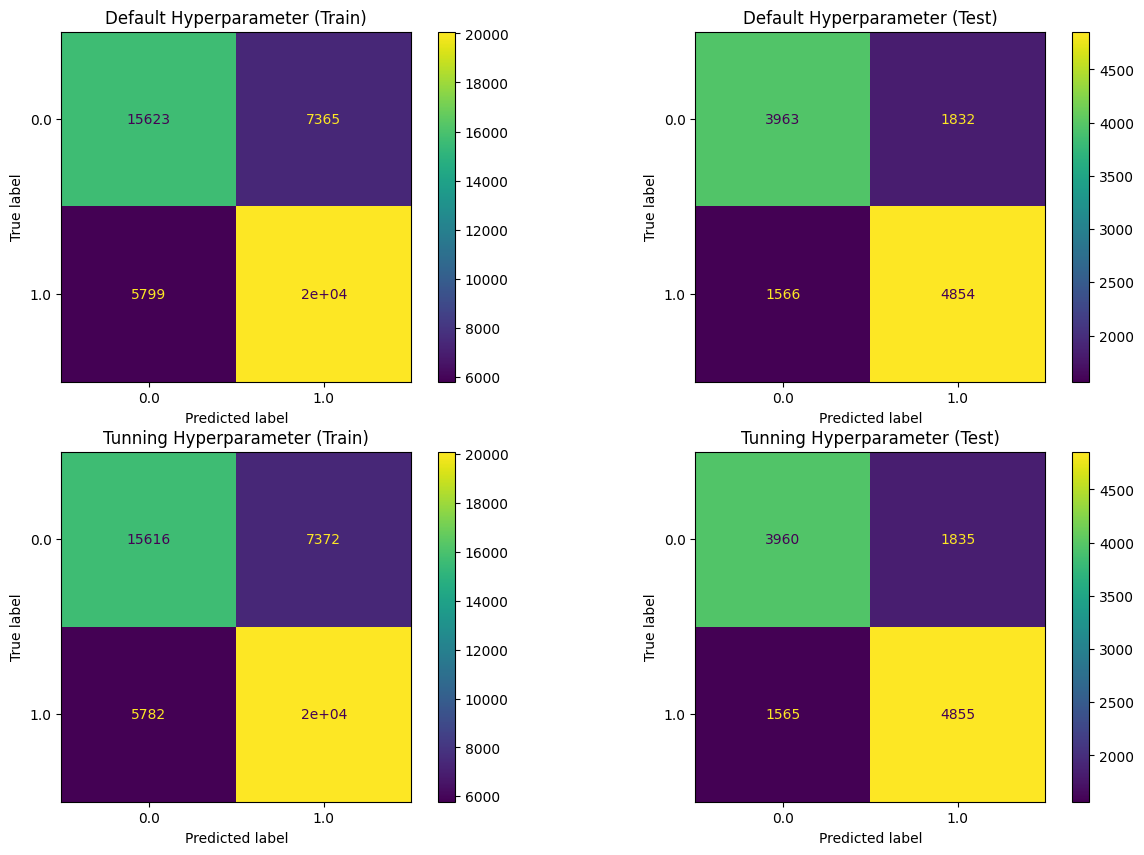

In [48]:
#show confusion matrix from predict train defaults hyperparameter vs tunning hyperparameter
cm_train = confusion_matrix(t_train, t_train_pred_default, labels=best_model.classes_)
cm_train_tun = confusion_matrix(t_train, t_train_pred_tunning, labels=best_model.classes_)
cm_test = confusion_matrix(t_test, t_test_pred_default, labels=best_model.classes_)
cm_test_tun = confusion_matrix(t_test, t_test_pred_tunning, labels=best_model.classes_)
disp_test = ConfusionMatrixDisplay(confusion_matrix=cm_test,display_labels=best_model.classes_)
disp_test_tun = ConfusionMatrixDisplay(confusion_matrix=cm_test_tun,display_labels=best_model.classes_)
disp_train = ConfusionMatrixDisplay(confusion_matrix=cm_train,display_labels=best_model.classes_)
disp_train_tun = ConfusionMatrixDisplay(confusion_matrix=cm_train_tun,display_labels=best_model.classes_)

fig, axes = plt.subplots(2,2, figsize=(15,10))
disp_train.plot(ax=axes[0,0])
axes[0,0].set_title('Default Hyperparameter (Train)')
disp_test.plot(ax=axes[0,1])
axes[0,1].set_title('Default Hyperparameter (Test)')
disp_train_tun.plot(ax=axes[1,0])
axes[1,0].set_title('Tunning Hyperparameter (Train)')
disp_test_tun.plot(ax=axes[1,1])
axes[1,1].set_title('Tunning Hyperparameter (Test)')
plt.show()

jika berdasarkan hasil plot confusion matrix nilai false negative dari model sedikit lebih rendah pada hyperparameter default dibandingkan dengan hyperparameter setelah ditunning, sehingga hyperparameter yang dipilih untuk di simpan adalah dengan default.

5. apakah model yang dibuat sudah cukup baik memprediksi resiko penyakit diabetes ?
   
   terlihat bahwa model yang dibuat sudah cukup baik untuk meprediksi resiko penyakit diabetes seseorang, dapat terlihat dari nilai F1 score yang diperoleh tidak jauh berbeda dengan nilai presision dan recall. dan juga nilai yang diperoleh antara model train dengan model test tidak jauh berbeda, walau pun performa model belum mencapai 80 %.
  
6. apa yang bisa dimprove dari model yang sudah dibuat ?
   * dapat dicoba untuk membuat model yang tahan terhadap adanya outlier dan tanpa melakukan handling outlier, dikarenakan adanya kemungkin miss interpretasi data sebenarnya ketika melakukan handling outlier dengan cara dicapping.
   * perlu dilakukan normalisasi data numberical, dikarenakan model yang terpilih lebih mudah belajar dari data dengan distribusi normal.

## Pembuatan Pipeline

In [49]:
# Membuat pipelines preparation
num_pipeline = Pipeline([('scaling', scaler)])
#cat pipepline

prep_pipeline = ColumnTransformer(transformers=[
                ('num_pipeline', num_pipeline, f_num_phik)
                #cat pipepline
                ], remainder='passthrough')
prep_pipeline

ColumnTransformer(remainder='passthrough',
                  transformers=[('num_pipeline',
                                 Pipeline(steps=[('scaling', MinMaxScaler())]),
                                 ['BMI'])])

disini kita tidak membuat pipeline categorical dikarenakan ditidak adanya feature engineering yang kita lakukan di kolom categorical.

In [50]:
# membuat 1 pipelines untuk untuk prediction
clf = Pipeline(steps=[
      ('preprocessing', prep_pipeline), 
      ('model', best_model)])
clf.fit(f_train[f_num_phik + f_cat_phik], t_train)

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num_pipeline',
                                                  Pipeline(steps=[('scaling',
                                                                   MinMaxScaler())]),
                                                  ['BMI'])])),
                ('model', LogisticRegression())])

## Model Saving

In [52]:
# saving model
with open('pipeline_clf.pkl', 'wb') as file_1:
  joblib.dump(clf, file_1)

## Conclusion

1. pertambahan usia dan penurunan BMI dapat mengurangi kejadian penyakit diabetes.
2. adanya hubungan antara riwayat penyakit jantung dengan resiko penyakit diabetes.
3. pasien golongan umur 10 (65-69 tahun) adalal pasien yang memiliki resiko penyakit diabetes paling tinggi.
4. Logistic Regression, KNN, Decision Tree, RandomForest adalah model classification yang dipakai dalam pembuatan model ini.
5. Model yang dibuat sudah cukup baik untuk meprediksi resiko penyakit diabetes seseorang.
6. Perlu dilakukan normalisasi data numberical, dikarenakan model yang terpilih lebih mudah belajar dari data dengan distribusi normal.
7. Model dapat diimprove dengan membuat model yang tahan terhadap adanya outlier dan tanpa melakukan handling outlier, dikarenakan adanya kemungkin miss interpretasi data sebenarnya ketika melakukan handling outlier dengan cara dicapping.